## Importing necessary libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading dataset

In [6]:
train_df = pd.read_csv('/content/drive/MyDrive/AI_ML_prep/DL/Sign Language Detection using CNN/sign_mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/AI_ML_prep/DL/Sign Language Detection using CNN/sign_mnist_test.csv')

In [10]:
train_df.shape

(27455, 785)

In [11]:
test_df.shape

(7172, 785)

In [12]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


## Preprocessing

In [13]:
# Preparing data
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

In [14]:
# Normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
# Reshaping the data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [16]:
# One-hot encoding the labels
y_train = to_categorical(y_train, num_classes=25)
y_test = to_categorical(y_test, num_classes=25)

## Visualizing

In [23]:
fig = px.imshow(X_train[0].reshape(28, 28), color_continuous_scale='gray')
fig.update_layout(title='Example from the training set')
fig.show()

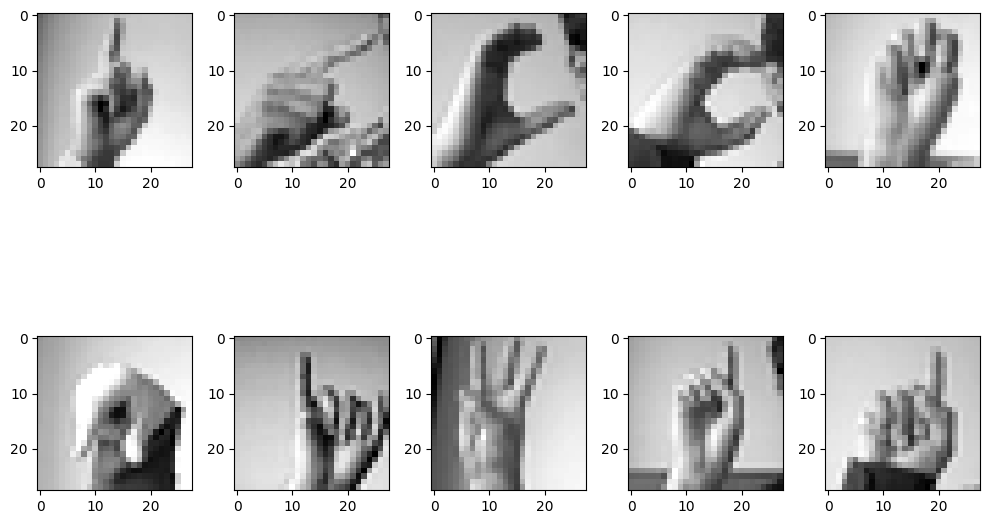

In [29]:
f, ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [18]:
label_counts = pd.Series(y_train.argmax(axis=1)).value_counts().sort_index()
fig = go.Figure(data=[go.Bar(x=label_counts.index, y=label_counts.values)])
fig.update_layout(title='Distribution of labels in the training set', xaxis_title='Label', yaxis_title='Count')
fig.show()

## Data augmentation

In [35]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [36]:
datagen.fit(X_train)

## CNN Model

In [40]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(25, activation='softmax')
])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 1, 1, 32)         

In [42]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
215/215 [==============================] - 11s 51ms/step - loss: 2.0622 - accuracy: 0.3315 - val_loss: 1.4050 - val_accuracy: 0.5944
Epoch 2/15
215/215 [==============================] - 11s 53ms/step - loss: 1.5240 - accuracy: 0.4922 - val_loss: 1.1447 - val_accuracy: 0.6256
Epoch 3/15
215/215 [==============================] - 12s 54ms/step - loss: 1.2359 - accuracy: 0.5773 - val_loss: 0.9450 - val_accuracy: 0.6532
Epoch 4/15
215/215 [==============================] - 11s 53ms/step - loss: 1.0751 - accuracy: 0.6316 - val_loss: 0.8663 - val_accuracy: 0.6907
Epoch 5/15
215/215 [==============================] - 10s 46ms/step - loss: 0.9429 - accuracy: 0.6738 - val_loss: 0.6864 - val_accuracy: 0.7411
Epoch 6/15
215/215 [==============================] - 11s 51ms/step - loss: 0.8352 - accuracy: 0.7112 - val_loss: 0.5646 - val_accuracy: 0.7801
Epoch 7/15
215/215 [==============================] - 13s 59ms/step - loss: 0.7565 - accuracy: 0.7410 - val_loss: 0.5165 - val_accuracy:

## Evaluation

In [46]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.2567165791988373
Test accuracy: 0.9109035134315491


### Classification Report

In [59]:
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)
report = classification_report(y_true, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

print(report_df)

225/225 [==============================] - 1s 3ms/step
              precision    recall  f1-score      support
0              0.882883  0.888218  0.885542   331.000000
1              1.000000  0.905093  0.950182   432.000000
2              0.952941  0.783871  0.860177   310.000000
3              0.894273  0.828571  0.860169   245.000000
4              0.963250  1.000000  0.981281   498.000000
5              0.945736  0.987854  0.966337   247.000000
6              0.936963  0.939655  0.938307   348.000000
7              0.951724  0.949541  0.950631   436.000000
8              0.905085  0.927083  0.915952   288.000000
10             0.890805  0.936556  0.913108   331.000000
11             0.943299  0.875598  0.908189   209.000000
12             0.914439  0.868020  0.890625   394.000000
13             0.699248  0.958763  0.808696   291.000000
14             0.802083  0.939024  0.865169   246.000000
15             1.000000  0.956772  0.977909   347.000000
16             1.000000  0.945122

### Confusion Matrix

In [48]:
cm = confusion_matrix(y_true, y_pred)

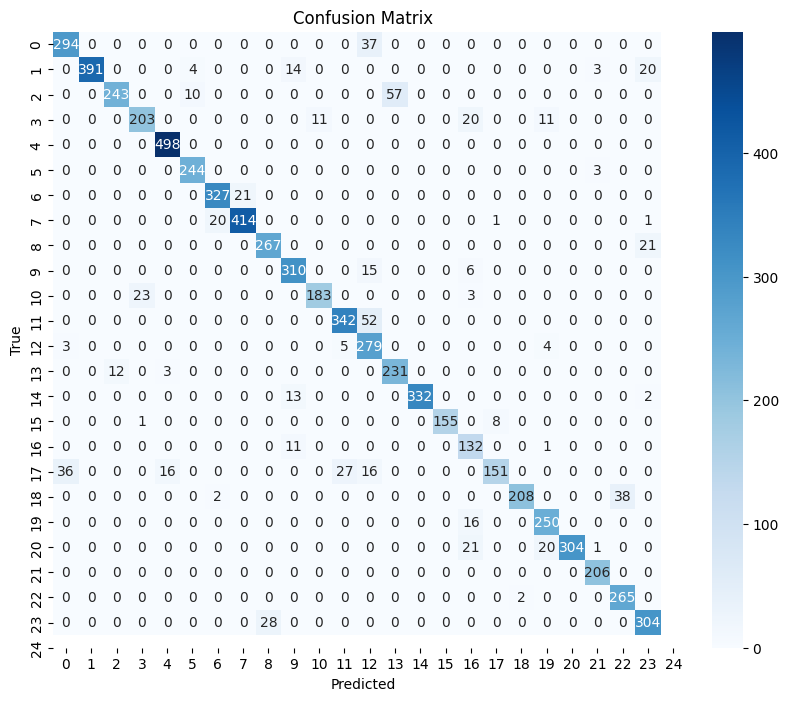

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(25), yticklabels=range(25))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Visualizing training history


In [63]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 16)), y=history.history['accuracy'], mode='lines+markers', name='Training Accuracy'))
fig.add_trace(go.Scatter(x=list(range(1, 16)), y=history.history['val_accuracy'], mode='lines+markers', name='Validation Accuracy'))
fig.update_layout(title='Model Accuracy', xaxis_title='Epoch', yaxis_title='Accuracy',width=800,height=400)
fig.show()

In [64]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 16)), y=history.history['loss'], mode='lines+markers', name='Training Loss'))
fig.add_trace(go.Scatter(x=list(range(1, 16)), y=history.history['val_loss'], mode='lines+markers', name='Validation Loss'))
fig.update_layout(title='Model Loss', xaxis_title='Epoch', yaxis_title='Loss',width=800,height=400)
fig.show()

### Testing the model via visualization


1/1 [==============================] - 0s 28ms/step


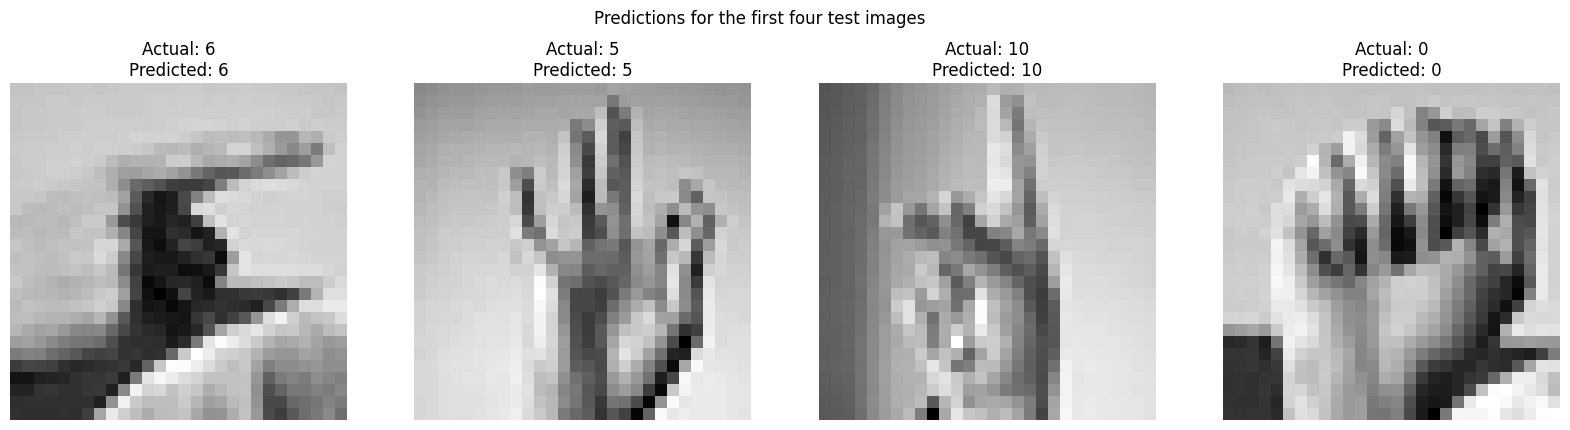

In [58]:
def get_actual_class(one_hot_encoded_label):
    return np.argmax(one_hot_encoded_label)

predictions = model.predict(X_test[:4])

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    predicted_class = np.argmax(predictions[i])
    actual_class = get_actual_class(y_test[i])
    ax.set_title(f'Actual: {actual_class}\nPredicted: {predicted_class}')
    ax.axis('off')

fig.suptitle('Predictions for the first four test images')
plt.show()